### El Haar2 parece andar mejor, pues considera todo el rango (igual que en matlab)

### Leer el paper con la parte técnica, y ver si explican cómo aplicar el filtro epsilon.
#### Esta funcionando bien (creo) para no uniforme - sin epsilon. Ojo igual que en el paper le agregan fluctuaciones al final para "recorrer completo" los datos ... Probar igualmente con otras bases para chequear, y después ver cómo meter epsilon (?)

In [1]:
# ** CHEQUEAR QUÉ LIBRERIAS ESTOY Y NO ESTOY USANDO** 
import pandas as pd
import numpy as np
import matplotlib as mtpl
import matplotlib.pyplot as plt

In [2]:
#dust_file='Haar Test2.xlsx'
dust_file='Dust records corregidos Completo.xlsx'
id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units','Data length']
id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)#skip row 1 o 0

df_data.head()

,Year,DustFlux,Year.1,DustFlux.1,Year.2,nssCa2 flux,Year.3,Ca2+,Year.4,Lithogenic,...,Year.8,DustFlux.5,Year.9,MAR,Year.10,DustConc,Year.11,Ca2+.1,Year.12,Part conc
0,4.509,602.784,0.375,0.259,1.19948,112.4,3.791,0.100000,0.620575,6.380517,...,1.15,238095.24,0.0,10.72,5.00,305.363666,7.8006,12.8,10.1479,60.539
1,4.552,423.903,0.400,0.329,1.21246,125.3,3.792,1.050000,0.827434,7.131424,...,2.20,238095.24,2.0,10.40,5.05,471.395055,7.8058,13.2,10.1555,73.720
2,4.690,299.095,0.425,0.652,1.22582,380.3,3.793,0.616667,1.034292,7.741062,...,3.25,277777.78,4.0,8.57,5.10,266.747998,7.8111,13.6,10.1631,52.932
3,5.259,734.449,0.450,0.341,1.23938,150.0,3.794,0.050000,1.241151,7.877875,...,4.15,265957.45,6.0,7.80,5.15,252.657484,7.8163,17.2,10.1707,76.469
4,5.674,603.242,0.475,0.312,1.25299,NaN,3.795,0.866667,1.448009,7.512894,...,5.09,263157.89,8.0,7.98,5.20,338.667402,7.8215,16.4,10.1781,56.083


In [3]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis=[] #Lista de dupla de dataframes: Age & Values
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]].dropna() #Elimino los Nan de cada columna (age & dust/temp)
        dupla.index=[j for j in range(0, len(dupla))] #Reset de los índices de la serie
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

801.425
31838


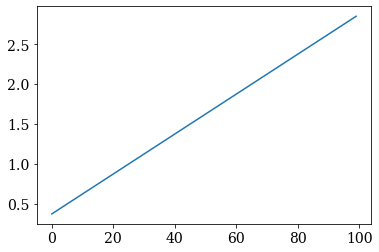

In [56]:
## VEO QUE NO ESTOY USANDO UNA BASE UNIFORME... CAMBIAR LUEGO A UNA UNIFORME

data_id=2
plt.plot(lis[data_id-1][lis[data_id-1].columns[0]])
print(max(lis[data_id-1][lis[data_id-1].columns[0]]))
print(len(lis[data_id-1][lis[data_id-1].columns[0]]))

In [53]:
x=lis[1][lis[1].columns[0]]
y=lis[1][lis[1].columns[1]]

In [54]:
len(x)

31838

In [88]:
#reductor de puntos... si me sirve, aplicarlo tambn a Talos dome para comparar con Shaun.

x_1=x[:500]
y_1=y[:500]
x_2=x[500:]
y_2=y[500:]

#new_x=np.array([])
#new_y=np.array([])
new_x=x_1
new_y=y_1

#for i in range(len(lis[1][lis[1].columns[0]])):
for i in range(len(x_2)):
    #print(i)
    if i%20==0:
        new_x=np.append(new_x,lis[1][lis[1].columns[0]][i])
        new_y=np.append(new_y,lis[1][lis[1].columns[1]][i])
print(len(new_x))
print(min(x_1),max(x_1))

2067
0.375 13.125


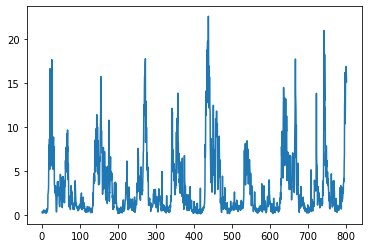

In [11]:
##Estoy haciendo EDC más "corto" en puntos, tomando 1 cada 20 puntos
##Es uniforme, correré luego ambos códigos (uniforme y no uniforme)}
##Ya conozco el comportamiento esperado del uniforme, y el del no uniforme debiese darme lo mismo-> sino, problems.

plt.plot(new_x,new_y)

In [12]:
font = {'family' : 'serif',
        'weight' : 'ultralight',
        'size'   : 14}

mtpl.rc('font', **font)

In [13]:
id_data

,Name,Data id,Latitud,Longitud,Age units,Data units,Data length
0,Vostok,1,-78.464167,106.865833,ka,(ug/m2/a),507
1,EPICA Dome C,2,-75.100000,123.350000,ka,(mg/m**2/a),31838
2,EPICA EDML,3,-75.002500,0.068400,ka,(ug/m**2/a),2303
3,Talos Dome,4,-72.817000,159.183000,ka BP,(µg/kg),64998
4,PS75/59-2,5,-54.215000,-125.425500,(kyr),(wt-%),2384
5,ML1208-17PC,6,0.480000,-156.450000,ka,(g/m2/yr),192
6,ML1208-31BB,7,4.680000,-160.050000,ka,(g/m2/yr),254
7,ML1208-37BB,8,7.040000,-161.630000,ka,(g/m2/yr),105
8,Xifeng,9,35.700000,107.600000,ka,(g/m^2/ka),722
9,Chinese Loess Plateau,10,35.760000,107.817333,ka,(g/cm3/ka),1801


Pasamos a calcular RMS para pasos de tiempo uniformes.

In [14]:
def HaarUniforme(x,y):
    calib=2; x=x*1000
    diff_year=x[1]-x[0]
    steps=2;steps_half=int(steps/2)
    
    ensemble_ave=np.array([])
    delta_t=np.array([])
    log_delta_t=np.array([])
    #print('ACAAAAA')
    while steps <= len(x)-1:
        #print(steps)
        delta_t=np.append(delta_t,steps*diff_year) #N° samples (steps) x diff años = delta_t en años
        log_delta_t=np.append(log_delta_t,np.log10(delta_t[-1])) 
        int_intervals=np.array([])
        inicio=steps
        while inicio<=len(x)-1:
            integration1=np.trapz(y[inicio-steps_half:inicio+1], x[inicio-steps_half:inicio+1])
            integration2=np.trapz(y[inicio-steps:inicio-steps_half+1], x[inicio-steps:inicio-steps_half+1])
            diff=2/(delta_t[-1])*(integration1-integration2)
            int_intervals=np.append(int_intervals,diff)
            inicio+=1
        
        maf=(np.mean(abs(int_intervals)))*calib
        ensemble_ave=np.append(ensemble_ave,maf)
        steps+=2
        steps_half=int(steps/2)
    return np.log10(ensemble_ave),delta_t,log_delta_t  
    #return ensemble_ave,delta_t,log_delta_t  

In [16]:
#[HU1,steps1,log_steps1]=HaarUniforme(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]])
#[HU_EDC,steps_EDC,log_steps_EDC]=HaarUniforme(new_x,new_y)

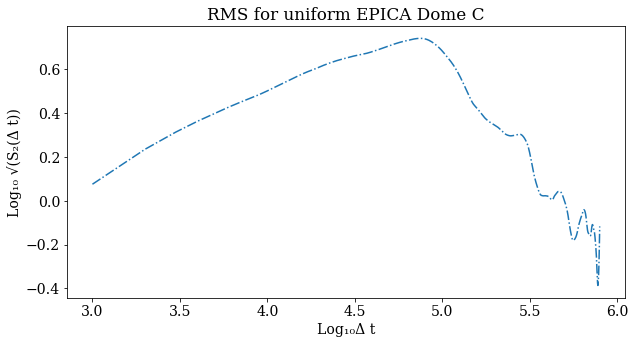

In [32]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps1,HU1,'-.')
plt.plot(log_steps_EDC,HU_EDC,'-.')
plt.title('RMS for uniform '+id_data['Name'][1])
plt.xlabel('Log\u2081\u2080\u0394 t')
plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
plt.savefig(id_data['Name'][0]+' complete RMS - Uniform.jpg',bbox_inches='tight')
plt.show()

Podemos notar que "parte en" 5, y que en general esta todo desplazado como hacia arriba en comparación a Matlab.
Probamos ahora RMS para pasos de tiempo no uniformes, considerando anchos de intervalos diferentes. NO ESTOY CONSIDERANDO aun el filtro Epsilon.*

In [4]:
def HaarTest(x,y):
    calib=2; x=x*1000
    steps=2;steps_half=int(steps/2)
    ensemble_ave=np.array([])
    delta_t=np.array([])
    log_delta_t=np.array([])
    
    while steps <= len(x)-1:
        diferencias=np.array([])
        int_intervals=np.array([])
        inicio=steps
        while inicio<=len(x)-1:
            diferencias=np.append(diferencias,x[inicio]-x[inicio-steps])
            integration1=np.trapz(y[inicio-steps_half:inicio+1], x[inicio-steps_half:inicio+1])
            integration2=np.trapz(y[inicio-steps:inicio-steps_half+1], x[inicio-steps:inicio-steps_half+1])
            diff=2/(diferencias[-1])*(integration1-integration2)
            int_intervals=np.append(int_intervals,diff)
            inicio+=1
        delta_t=np.append(delta_t,np.mean(diferencias)) #*****
        #delta_t=np.append(delta_t,np.percentile(diferencias, 50)) #*****
        
        log_delta_t=np.append(log_delta_t,np.log10(delta_t[-1]))#***** 
        
        maf=(np.mean(abs(int_intervals)))*calib
        ensemble_ave=np.append(ensemble_ave,maf)
        steps+=2
        steps_half=int(steps/2)
        
        #if steps%20==0:
         #   print(steps)
    #print('Utilizando mean')
    return np.log10(ensemble_ave),delta_t,log_delta_t  


In [89]:
#[HT_EDC,stepsT_EDC,log_stepsT_EDC]=HaarUniforme(new_x,new_y)
#[HT2_EDC,stepsT2_EDC,log_stepsT2_EDC]=HaarUniforme(new_x,new_y)
[HT3_EDC,stepsT3_EDC,log_stepsT3_EDC]=HaarUniforme(new_x,new_y)

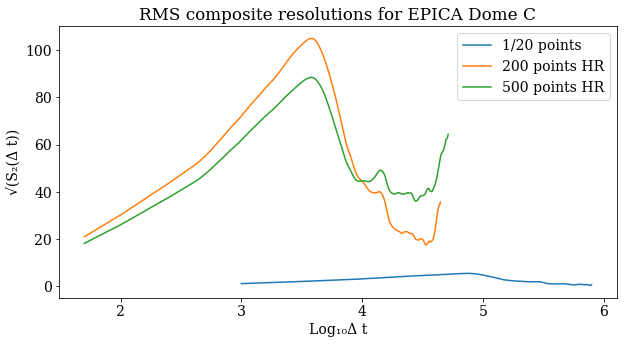

In [92]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps1,HU1,'-.')
plt.plot(log_stepsT_EDC,10**HT_EDC,'-',label='1/20 points')
plt.plot(log_stepsT2_EDC,10**HT2_EDC,'-',label='200 points HR')
plt.plot(log_stepsT3_EDC,10**HT3_EDC,'-',label='500 points HR')

plt.title('RMS composite resolutions for '+id_data['Name'][1])
plt.xlabel('Log\u2081\u2080\u0394 t')
#plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
plt.ylabel('\u221a(S\u2082(\u0394 t))')
plt.legend()
plt.savefig(id_data['Name'][1]+' resolutions.jpg',bbox_inches='tight')
plt.show()

In [6]:
#[HT2,steps2,log_steps2]=HaarTest(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]])
[HT_vostok,steps_vostok,log_steps_vostok]=HaarTest(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]])
#[HT_EDML,steps_EDML,log_steps_EDML]=HaarTest(lis[2][lis[2].columns[0]],lis[2][lis[2].columns[1]])
#[HT_17PC,steps_17PC,log_steps_17PC]=HaarTest(lis[5][lis[5].columns[0]],lis[5][lis[5].columns[1]])
#[HT_31BB,steps_31BB,log_steps_31BB]=HaarTest(lis[6][lis[6].columns[0]],lis[6][lis[6].columns[1]])
#[HT_37BB,steps_37BB,log_steps_37BB]=HaarTest(lis[7][lis[7].columns[0]],lis[7][lis[7].columns[1]])
#[HT_xifeng,steps_xifeng,log_steps_xifeng]=HaarTest(lis[8][lis[8].columns[0]],lis[8][lis[8].columns[1]])
#[HT_loess,steps_loess,log_steps_loess]=HaarTest(lis[9][lis[9].columns[0]],lis[9][lis[9].columns[1]])
#[HT_recap,steps_recap,log_steps_recap]=HaarTest(lis[10][lis[10].columns[0]],lis[10][lis[10].columns[1]])

In [9]:
q=pd.DataFrame(log_steps_vostok,columns=['Deltas t']);qq=pd.DataFrame(HT_vostok,columns=['Values'])
df=pd.concat([q,qq],axis=1).sort_values('Deltas t')
df

,Deltas t,Values
0,3.217855,3.692324
1,3.516550,3.549030
2,3.690507,3.480673
3,3.813412,3.452927
4,3.908898,3.461761
...,...,...
248,5.606789,2.289320
249,5.610295,2.275547
250,5.614311,2.288047
251,5.618638,2.316418


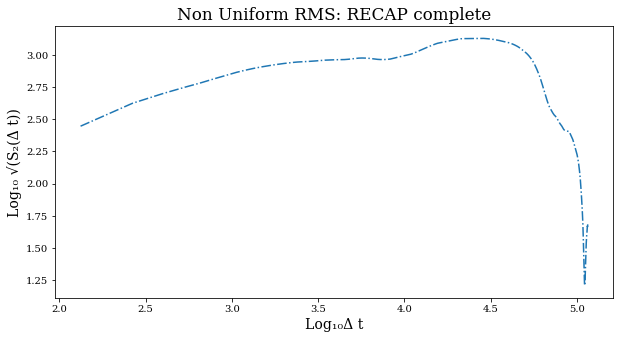

In [103]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps2,HT2,'-.')
plt.plot(log_steps_recap,HT_recap,'-.')
plt.title('Non Uniform RMS: '+id_data['Name'][10]+' complete')
plt.xlabel('Log\u2081\u2080\u0394 t')
plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
mtpl.rc('xtick', labelsize=10) 
mtpl.rc('ytick', labelsize=10)

#plt.savefig(str(11)+'- '+id_data['Name'][10]+' complete RMS - NonUniform.jpg',bbox_inches='tight')

plt.show()

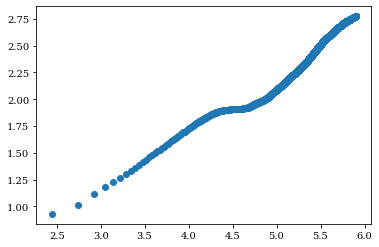

In [25]:
#plt.plot(log_steps2,10**HT2)
plt.plot(log_steps2,HT2,'o')

Probamos ahora aplicando un smoothing al paso de tiempo, tal como lo hacen en el paper. (To reduce the resulting fluctuation)

In [51]:
def Smooth121(x):
    signal = x
    length = len(signal)
    output = np.zeros(length-2)
    coef= np.array([1,2,1])
    for i in range(length - 2):
       output[i]= np.sum(signal[i:i+3] * coef / 4)
    return output

In [52]:
smooth_t=Smooth121(lis[0][lis[0].columns[0]])

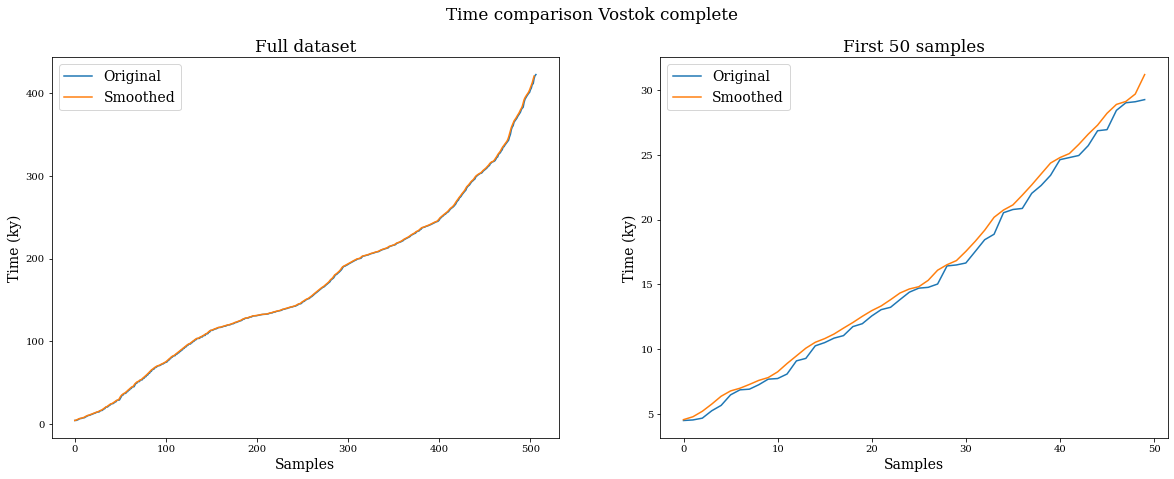

In [55]:
#plt.subplots(figsize=(10, 5))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 7))


fig.suptitle('Time comparison '+id_data['Name'][0]+' complete')
ax1.set_title('Full dataset')
ax1.plot(lis[0][lis[0].columns[0]],label='Original')
ax1.plot(smooth_t,label='Smoothed')
ax1.set(xlabel='Samples', ylabel='Time (ky)')
ax1.legend()

ax2.plot(lis[0][lis[0].columns[0]][:50],label='Original')
ax2.plot(smooth_t[:50],label='Smoothed')
ax2.set_title('First 50 samples')
ax2.set(xlabel='Samples', ylabel='Time (ky)')
ax2.legend()
mtpl.rc('xtick', labelsize=10) 
mtpl.rc('ytick', labelsize=10)

#plt.savefig(str(1)+'- '+id_data['Name'][0]+' time comparison.jpg',bbox_inches='tight')


plt.show()


In [56]:
[HT3,steps3,log_steps3]=HaarTest(smooth_t,lis[0][lis[0].columns[1]][:-2])

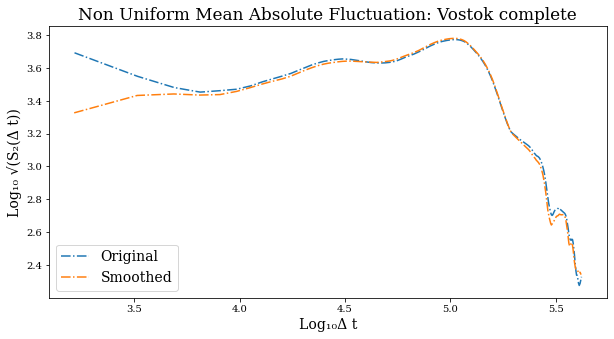

In [68]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps2,HT2,'-.',label='Original')
plt.plot(log_steps_vostok,HT_vostok,'-.',label='Original')
plt.plot(log_steps3,HT3,'-.',label='Smoothed')
plt.title('Non Uniform Mean Absolute Fluctuation: '+id_data['Name'][0]+' complete')
plt.xlabel('Log\u2081\u2080\u0394 t')
plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
plt.legend()
mtpl.rc('xtick', labelsize=10) 
mtpl.rc('ytick', labelsize=10)

#plt.savefig(str(1)+'- '+id_data['Name'][0]+' original vs smoothed.jpg',bbox_inches='tight')

plt.show()

Decido entonces quedarme con el original, sin aplicar el smoothing. Probaré ahora qué pasa si filtro según epsilon.

In [59]:
def HaarEpsilon(x,y,ep):
    calib=2; x=x*1000
    epsilon_min=ep #********
    epsilon_max=1-epsilon_min#********
    steps=2;steps_half=int(steps/2)
    ensemble_ave=np.array([])
    delta_t=np.array([])
    log_delta_t=np.array([])
    
    while steps <= len(x)-1:
        diferencias=np.array([])
        int_intervals=np.array([])
        inicio=steps
        while inicio<=len(x)-1:
            epsilon=(x[inicio]-x[inicio-steps_half])/(x[inicio]-x[inicio-steps])           
            if (epsilon_min<epsilon and epsilon<epsilon_max):
                diferencias=np.append(diferencias,x[inicio]-x[inicio-steps])
                integration1=np.trapz(y[inicio-steps_half:inicio+1], x[inicio-steps_half:inicio+1])
                integration2=np.trapz(y[inicio-steps:inicio-steps_half+1], x[inicio-steps:inicio-steps_half+1])
                diff=2/(diferencias[-1])*(integration1-integration2)
                int_intervals=np.append(int_intervals,diff)
            inicio+=1
        delta_t=np.append(delta_t,np.mean(diferencias)) #*****
        #delta_t=np.append(delta_t,np.percentile(diferencias, 50)) #*****
        
        log_delta_t=np.append(log_delta_t,np.log10(delta_t[-1]))#***** 
        
        maf=(np.mean(abs(int_intervals)))*calib
        ensemble_ave=np.append(ensemble_ave,maf)
        steps+=2
        steps_half=int(steps/2)
    #print('Utilizando mean')
    return np.log10(ensemble_ave),delta_t,log_delta_t

In [60]:
[HE4,steps4,log_steps4]=HaarEpsilon(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]],0.25)

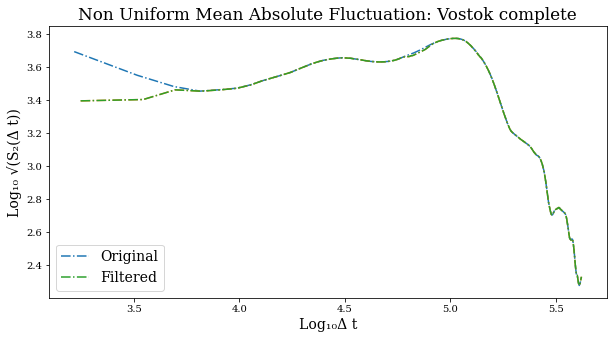

In [70]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps2,HT2,'-.',label='Original')
plt.plot(log_steps_vostok,HT_vostok,'-.',label='Original')
plt.plot(log_steps4,HE4,'-.')
plt.plot(log_steps4,HE4,'-.',label='Filtered')
plt.title('Non Uniform Mean Absolute Fluctuation: '+id_data['Name'][0]+' complete')
plt.xlabel('Log\u2081\u2080\u0394 t')
plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
plt.legend()
mtpl.rc('xtick', labelsize=10) 
mtpl.rc('ytick', labelsize=10)

#plt.savefig(str(1)+'- '+id_data['Name'][0]+' original vs filtered.jpg',bbox_inches='tight')

plt.show()

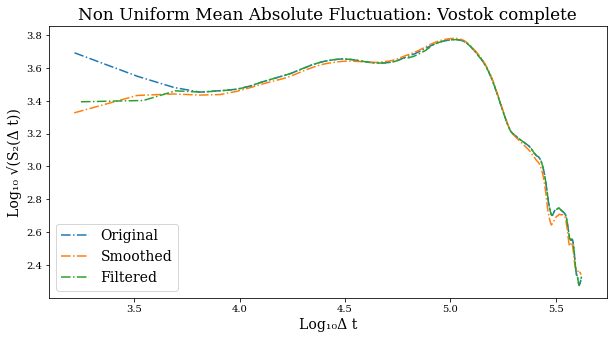

In [66]:
plt.subplots(figsize=(10, 5))
#plt.plot(log_steps1,HU1,'-.',label='Uniform aproach')
#plt.plot(log_steps2,HT2,'-.',label='Original')
plt.plot(log_steps_vostok,HT_vostok,'-.',label='Original')
plt.plot(log_steps3,HT3,'-.',label='Smoothed')
plt.plot(log_steps4,HE4,'-.',label='Filtered')
plt.title('Non Uniform Mean Absolute Fluctuation: '+id_data['Name'][0]+' complete')
plt.xlabel('Log\u2081\u2080\u0394 t')
plt.ylabel('Log\u2081\u2080 \u221a(S\u2082(\u0394 t))')
plt.legend()
mtpl.rc('xtick', labelsize=10) 
mtpl.rc('ytick', labelsize=10)

#plt.savefig(str(1)+'- '+id_data['Name'][0]+' methods comparison.jpg',bbox_inches='tight')

plt.show()